In [1]:
# %matplotlib Qt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from modules import Perceptron, Perceptron_weather

In [3]:
data = pd.read_csv('data/weatherHistory.csv')
data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [4]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
# Pre proccessing
data['Date'] = data['Formatted Date'].str[:10]
data['Time'] = data['Formatted Date'].str[11:13]
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.dayofyear
data['Precip Type'] = data['Precip Type'].replace(['rain', 'snow'], [1, 2])
data['Precip Type'] = data['Precip Type'].fillna(0)
data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time,Day
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,1.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00,91
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01,91
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,1.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02,91


In [6]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Date                        0
Time                        0
Day                         0
dtype: int64

In [7]:
data = data.sort_values(by=['Date'], ascending=True).reset_index()
data.head(3)

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time,Day
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,1.0,5.472222,1.377778,0.87,22.7171,149.0,14.7959,0.0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22,1
1,2903,2006-01-01 23:00:00.000 +0100,Overcast,1.0,5.422222,1.666667,0.86,19.5615,148.0,15.6492,0.0,1009.64,Mostly cloudy throughout the day.,2006-01-01,23,1
2,2901,2006-01-01 21:00:00.000 +0100,Overcast,1.0,4.933333,0.555556,0.86,23.9407,139.0,15.7297,0.0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21,1


In [8]:
# Calculate the average temperature of each day
daily_avg_temp = data.groupby('Day')['Temperature (C)'].mean().reset_index()
daily_avg_temp.columns = ['Day', 'Ave-Temperature']

# Add Ave-Temperature column to dataset
data['Ave-Temperature'] = data['Day'].map(daily_avg_temp.set_index('Day')['Ave-Temperature'])

daily_avg_temp

,Day,Ave-Temperature
0,1,-1.211048
1,2,-0.310606
2,3,-0.437689
3,4,-0.755240
4,5,0.451999
...,...,...
361,362,-0.676768
362,363,-0.765236
363,364,-1.586974
364,365,-1.938952


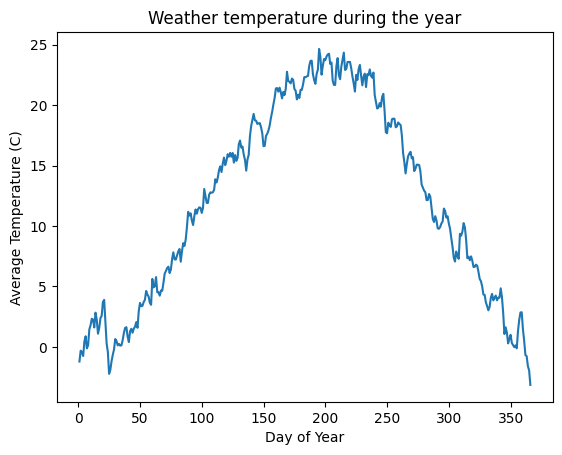

In [9]:
plt.plot(daily_avg_temp['Day'], daily_avg_temp['Ave-Temperature'])
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (C)')
plt.title('Weather temperature during the year')
plt.show()

In [11]:
# X = data[['Precip Type', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']].copy().values
# Y = data[['Temperature (C)']].copy().values

X = data[['Day']].copy().values
Y = data[['Ave-Temperature']].copy().values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((77162, 1), (19291, 1), (77162, 1), (19291, 1))

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
learning_rate_w = 0.00001
learning_rate_b = 0.00001
Epoch = 0
stop_condition = False
loss_threshold = 0.0001  # Threshold for stopping condition

In [15]:
model = Perceptron_weather(
                input_size=X_train.shape[1], 
                lr_w=learning_rate_w, 
                lr_b=learning_rate_b, 
                epoch=Epoch, 
                loss_threshold=loss_threshold, 
                function='linear'
            )
model.fit(X_train, Y_train, X_test, Y_test)

📚Epoch 1, Train Loss: 91.63425020140798, Train Accuracy: 0.0
📄Epoch 1, Test Loss: 92.74705068698535, Test Accuracy: 0.0
📚Epoch 2, Train Loss: 71.40170388098649, Train Accuracy: 0.0
📄Epoch 2, Test Loss: 72.0798364287893, Test Accuracy: 0.0
📚Epoch 3, Train Loss: 67.26614312663436, Train Accuracy: 0.0
📄Epoch 3, Test Loss: 67.74119441453898, Test Accuracy: 0.0
📚Epoch 4, Train Loss: 66.46926003907913, Train Accuracy: 0.0
📄Epoch 4, Test Loss: 66.84997519957118, Test Accuracy: 0.0
📚Epoch 5, Train Loss: 66.339113163477, Train Accuracy: 0.0
📄Epoch 5, Test Loss: 66.67612225461258, Test Accuracy: 0.0
📚Epoch 6, Train Loss: 66.32985563605256, Train Accuracy: 0.0
📄Epoch 6, Test Loss: 66.64664016404346, Test Accuracy: 0.0
📚Epoch 7, Train Loss: 66.3364537775889, Train Accuracy: 0.0
📄Epoch 7, Test Loss: 66.64388481230162, Test Accuracy: 0.0
📚Epoch 8, Train Loss: 66.34182823927033, Train Accuracy: 0.0
📄Epoch 8, Test Loss: 66.64493456931216, Test Accuracy: 0.0
📚Epoch 9, Train Loss: 66.3448093489693, Trai

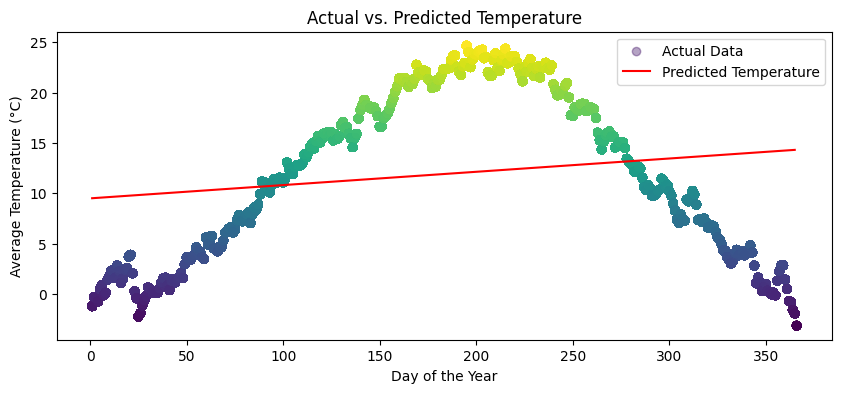

In [38]:
days = np.arange(1, 366)
scaled_days = scaler.transform(days.reshape(-1, 1))
predicted_temperatures = model.predict(scaled_days)

plt.figure(figsize=(10, 4))

plt.scatter(data['Day'], data['Ave-Temperature'], c=data['Ave-Temperature'], label='Actual Data', alpha=0.4)
plt.plot(days, predicted_temperatures, color='red', label='Predicted Temperature')
plt.title("Data Ave-Temperature")
plt.xlabel('Day of the Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.show()

In [16]:
epochs = range(1, model.Epoch + 1)


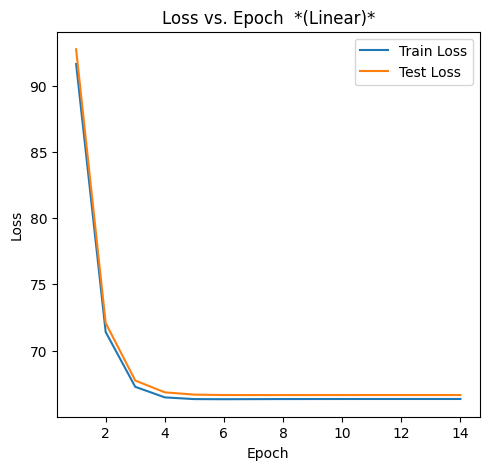

In [17]:
# Loss chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, model.losses_train, label='Train Loss')
plt.plot(epochs, model.losses_test, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch  *(Linear)*')
plt.legend()
plt.show()

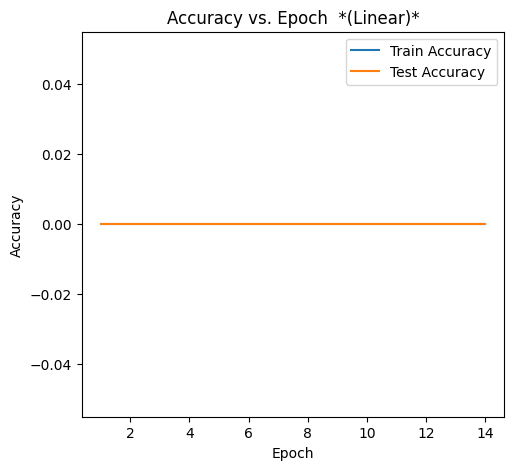

In [18]:
# Accuracy chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, model.accuracies_train, label='Train Accuracy')
plt.plot(epochs, model.accuracies_test, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch  *(Linear)*')
plt.legend()

plt.show()

In [19]:
model.evaluate(X_test, Y_test)

(66.64698574686493, 0.0)

In [33]:
day = 300
if not isinstance(day, int) or day < 1 or day > 365:
    raise ValueError("Day باید یک عدد صحیح بین 1 و 365 باشد.")

# Standardize the input day
scaled_day = scaler.transform(np.array([[day]]))

predicted_temp = model.predict(scaled_day)

# print(predicted_temp)
print(f"The predicted temperature for day 100 is: {predicted_temp[0]:.2f}°C")

The predicted temperature for day 100 is: 13.45°C
